# CanESM5 GMD paper Figure 08
## cloud fraction

### history
-  SJH, first look 2019-05-12

In [12]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
from pprint import pprint
import os
from datetime import datetime
import cartopy.crs as ccrs
import cartopy
import cmocean
from cdo import Cdo
import modules.basic_stats as bst
import modules.plotting_module as pltm
import sqlite3

cdo = Cdo()
cdo.setCdo('/home/ords/crd/ccrn/scrd104/miniconda3/bin/cdo')

In [13]:
%store -r fig_08_start 
%store -r fig_08_end
%store -r title_fontsize


start = fig_08_start
end = fig_08_end

startdate = datetime.strptime(start,'%Y-%m-%d')
enddate   = datetime.strptime(end,'%Y-%m-%d')

In [14]:
#remap the CanESM5 realizations and the ISCCP observation onto a common grid

runCDO = False

if runCDO:
    for root, subdirs, files in os.walk('input_data/CanESM5_cmip_dir/historical/'):
        #narrow down the walk
        if 'Amon' in subdirs:
            subdirs[:] = ['Amon']
        if 'clt' in subdirs:
            subdirs[:] = ['clt']

        for filename in files:
            var, tab, model, expt, rl, grid, dates = filename.split('_')
            if rl.endswith('i1p1f1'):
                CanESM5_clt = filename
                ifile = os.path.join(root, CanESM5_clt)
                ofile = 'input_data/processed_data/clt/remap-woa09_' + CanESM5_clt
                cdo.remapbil('input_data/obs/woa/woa09/uncs_woa09_ann_tpot.nc', input=ifile, output=ofile)

                
    for root, subdirs, files in os.walk('input_data/CanESM2_large_ensemble/'):
        #narrow down the walk
        if 'mon' in subdirs:
            subdirs[:] = ['mon']
        if 'atmos' in subdirs:
            subdirs[:] = ['atmos']
        if 'clt' in subdirs:
            subdirs[:] = ['clt']
        for filename in files:
            if filename.endswith('_195001-202012.nc') and ('historical-' in filename):
                print(filename)
                CanESM2_clt = filename
                ifile = os.path.join(root, CanESM2_clt)
                ofile = 'input_data/processed_data/clt/remap-woa09_' + CanESM2_clt
                cdo.remapbil('input_data/obs/woa/woa09/uncs_woa09_ann_tpot.nc', input=ifile, output=ofile)           

if True:                
    ISCCP = 'ISCCP-Basic.HGM.v01r00.GLOBAL.1991.01.2010.12.99.9999.GPC.10KM.CS00.EA1.00_cldamt2.nc'
    ifile = os.path.join('obs/ISCCP/', ISCCP)
    ofile = 'input_data/processed_data/clt/remap-woa09_' + ISCCP
    cdo.remapbil('input_data/obs/woa/woa09/uncs_woa09_ann_tpot.nc', input=ifile, output=ofile)
    

In [15]:
#ISCCP (units %)

cloud_obs_i = xr.open_dataset('input_data/processed_data/clt/remap-woa09_ISCCP-Basic.HGM.v01r00.GLOBAL.1991.01.2010.12.99.9999.GPC.10KM.CS00.EA1.00_cldamt2.nc')['cldamt'].squeeze()
cloud_obs_o = xr.open_dataset('input_data/processed_data/clt/remap-woa09_ISCCP-Basic.HGM.v01r00.GLOBAL.1991.01.2010.12.99.9999.GPC.10KM.CS00.EA1.00_timmean_T63.nc')['cldamt'].squeeze()

#cloud_obs = pltm.addCyclicPoint(cloud_obs_i, 'lon')

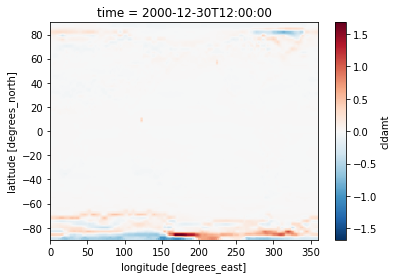

In [16]:
((cloud_obs_i.mean(dim='time') - cloud_obs_o)/cloud_obs_o*100).plot()

In [17]:
clt = xr.open_dataset('input_data/processed_data/clt/remap-woa09_clt_Amon_CanESM5_historical_r1i1p1f1_gn_185001-201412.nc')['clt'].sel(time=slice(start, end)) 

In [18]:
clt_DJF = pltm.get_seasonal(clt,'noleap','DJF')
clt_JJA = pltm.get_seasonal(clt,'noleap','JJA')
clt_tmean = pltm.get_weighted_globalmean(clt, 'noleap', start, end)

clt_obs_DJF = pltm.get_seasonal(cloud_obs_i,'noleap','DJF')
clt_obs_JJA = pltm.get_seasonal(cloud_obs_i,'noleap','JJA')
#clt_obs_tmean = pltm.get_weighted_globalmean(cloud_obs_i, 'noleap', start, end)
clt_obs_tmean = cloud_obs_i.mean(dim='time')

In [19]:
#CanESM5 (units %)

CanESM5 = {}
for root, subdirs, files in os.walk('input_data/processed_data/clt/'):
    for filename in files:
        if filename.startswith('remap-woa09_clt_Amon_CanESM5'):
            mapping, var, tab, model, expt, rl, grid, dates = filename.split('_')
            print(rl)
            clt = xr.open_dataset(os.path.join(root,filename))['clt']
            clt_weighted_timemean = pltm.get_weighted_globalmean(clt, 'noleap', start, end)      
 
            CanESM5[rl] = clt_weighted_timemean  


CanESM5_rels = xr.concat([CanESM5[rel] for rel in CanESM5],dim='realization')
CanESM5_relmean_i = CanESM5_rels.mean('realization')
CanESM5_relmean = pltm.addCyclicPoint(CanESM5_relmean_i, 'lon')

r17i1p1f1
r11i1p1f1
r15i1p1f1
r25i1p1f1
r7i1p1f1
r19i1p1f1
r21i1p1f1
r3i1p1f1
r4i1p1f1
r20i1p1f1
r9i1p1f1
r8i1p1f1
r2i1p1f1
r18i1p1f1
r10i1p1f1
r13i1p1f1
r6i1p1f1
r24i1p1f1
r12i1p1f1
r16i1p1f1
r1i1p1f1
r23i1p1f1
r14i1p1f1
r22i1p1f1
r5i1p1f1


In [20]:
#CanESM2 (units %)

CanESM2 = {}
for root, subdirs, files in os.walk('input_data/processed_data/clt/'):
    for filename in files:
        if filename.startswith('remap-woa09_clt_Amon_CanESM2'):
            mapping, var, tab, model, expt, rl, dates = filename.split('_')
            rl = expt[-2:] + rl
            print(rl)
            clt = xr.open_dataset(os.path.join(root,filename))['clt']
            clt_weighted_timemean = pltm.get_weighted_globalmean(clt, 'noleap', start, end)   

            CanESM2[rl] = clt_weighted_timemean  


CanESM2_rels = xr.concat([CanESM2[rel] for rel in CanESM2],dim='realization')
CanESM2_relmean_i = CanESM2_rels.mean('realization')
CanESM2_relmean = pltm.addCyclicPoint(CanESM2_relmean_i, 'lon')

r4r4i1p1
r1r9i1p1
r2r5i1p1
r3r8i1p1
r5r2i1p1
r1r3i1p1
r5r4i1p1
r4r10i1p1
r3r3i1p1
r3r2i1p1
r2r10i1p1
r3r4i1p1
r3r7i1p1
r4r2i1p1
r5r3i1p1
r2r8i1p1
r1r7i1p1
r5r8i1p1
r2r2i1p1
r2r9i1p1
r4r5i1p1
r4r9i1p1
r1r1i1p1
r3r5i1p1
r4r1i1p1
r1r2i1p1
r3r6i1p1
r1r10i1p1
r1r6i1p1
r3r9i1p1
r4r7i1p1
r3r10i1p1
r5r5i1p1
r5r1i1p1
r3r1i1p1
r4r8i1p1
r5r6i1p1
r2r4i1p1
r1r8i1p1
r2r3i1p1
r5r9i1p1
r1r4i1p1
r2r6i1p1
r2r1i1p1
r5r10i1p1
r5r7i1p1
r4r6i1p1
r2r7i1p1
r4r3i1p1
r1r5i1p1


In [10]:
clt_anomaly = CanESM5_relmean - cloud_obs

NameError: name 'cloud_obs' is not defined

In [ ]:
fig = plt.figure(figsize=(8,8))

ax1 = plt.subplot(2,1,1,projection=ccrs.Robinson())
cb_clt = ax1.pcolormesh(CanESM5_relmean.lon, CanESM5_relmean.lat,CanESM5_relmean, cmap=plt.cm.viridis, transform=ccrs.PlateCarree())
pltm.add_cbar('left', fig, ax1, cb_clt, extend='both', label =r'clt (%)')
ax1.contour(CanESM5_relmean.lon, CanESM5_relmean.lat, CanESM5_relmean, 10, colors='k', transform=ccrs.PlateCarree(), linewidths=1)
ax1.set_title('(a)')


ax2 = plt.subplot(2,1,2,projection=ccrs.Robinson())
cb_cltan = ax2.pcolormesh(clt_anomaly.lon, clt_anomaly.lat,clt_anomaly, cmap=plt.cm.RdBu_r, vmin=-50, vmax=50, transform=ccrs.PlateCarree())
pltm.add_cbar('left', fig, ax2, cb_cltan, extend='both', label =r'$\Delta$ clt (%)')
ax2.contour(clt_anomaly.lon, clt_anomaly.lat, clt_anomaly, 10, colors='k', transform=ccrs.PlateCarree(), linewidths=1)
ax2.set_title('(b)')

plt.subplots_adjust(wspace=0.05)  

for ax in [ax1,ax2]:
    ax.coastlines()

#fig.savefig('plots/fig-08_cloud_fraction.png', bbox_inches='tight')
#fig.savefig('plots/fig-08_cloud_fraction.pdf', bbox_inches='tight')

In [21]:
clt_DJF = pltm.addCyclicPoint(clt_DJF, 'lon')
clt_JJA = pltm.addCyclicPoint(clt_JJA, 'lon')
clt_tmean = pltm.addCyclicPoint(clt_tmean, 'lon')

clt_obs_DJF = pltm.addCyclicPoint(clt_obs_DJF, 'lon')
clt_obs_JJA = pltm.addCyclicPoint(clt_obs_JJA, 'lon')
clt_obs_tmean = pltm.addCyclicPoint(clt_obs_tmean, 'lon')

clt_anomaly =clt_tmean - clt_obs_tmean

/home/ords/crd/ccrn/scrd104/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


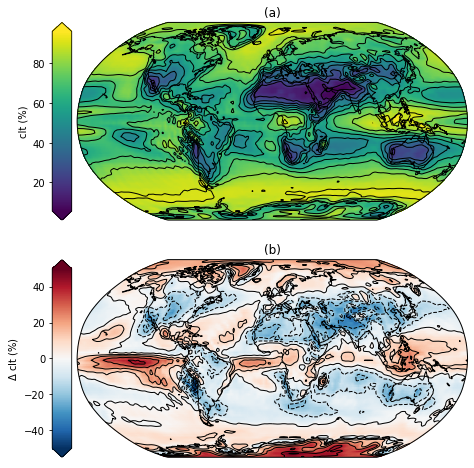

In [22]:
# This figure is a comparison to the original submitted version, but calculated off the ISCCP monthly data. Below I do seasonal for the revision.
fig = plt.figure(figsize=(8,8))

ax1 = plt.subplot(2,1,1,projection=ccrs.Robinson())
cb_clt = ax1.pcolormesh(clt_tmean.lon, clt_tmean.lat, clt_tmean, cmap=plt.cm.viridis, transform=ccrs.PlateCarree())
pltm.add_cbar('left', fig, ax1, cb_clt, extend='both', label =r'clt (%)')
ax1.contour(clt_tmean.lon, clt_tmean.lat, clt_tmean, 10, colors='k', transform=ccrs.PlateCarree(), linewidths=1)
ax1.set_title('(a)')


ax2 = plt.subplot(2,1,2,projection=ccrs.Robinson())
cb_cltan = ax2.pcolormesh(clt_anomaly.lon, clt_anomaly.lat,clt_anomaly, cmap=plt.cm.RdBu_r, vmin=-50, vmax=50, transform=ccrs.PlateCarree())
pltm.add_cbar('left', fig, ax2, cb_cltan, extend='both', label =r'$\Delta$ clt (%)')
ax2.contour(clt_anomaly.lon, clt_anomaly.lat, clt_anomaly, 10, colors='k', transform=ccrs.PlateCarree(), linewidths=1)
ax2.set_title('(b)')

plt.subplots_adjust(wspace=0.05)  

for ax in [ax1,ax2]:
    ax.coastlines()

/home/ords/crd/ccrn/scrd104/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/home/ords/crd/ccrn/scrd104/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/home/ords/crd/ccrn/scrd104/mi

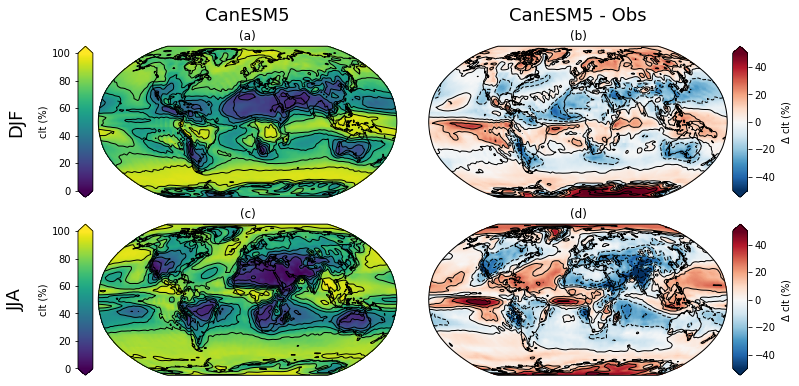

In [23]:
# Seasonal figure for the revision 1.

fig = plt.figure(figsize=(12,12))
cmap2=plt.cm.RdBu_r

ax1 = plt.subplot(3,2,1,projection=ccrs.Robinson())
cb_tas = ax1.pcolormesh(clt_tmean.lon, clt_tmean.lat, clt_DJF, 
                        cmap=plt.cm.viridis, transform=ccrs.PlateCarree(), vmin=0, vmax=100, rasterized=True)
pltm.add_cbar('left', fig, ax1, cb_tas, extend='both', label =r'clt (%)')
ax1.contour(clt_tmean.lon, clt_tmean.lat, clt_DJF, 7, colors='k', transform=ccrs.PlateCarree(), linewidths=1)
ax1.set_title('(a)')
ax1.text(0.5, 1.2, 'CanESM5', horizontalalignment='center', verticalalignment='center', fontsize=title_fontsize,
         transform=ax1.transAxes)
ax1.text(-0.275, 0.5, 'DJF', horizontalalignment='center', verticalalignment='center',rotation='vertical', 
         fontsize=title_fontsize, transform=ax1.transAxes)

ax3 = plt.subplot(3,2,2,projection=ccrs.Robinson())
cb_tasan = ax3.pcolormesh(clt_tmean.lon, clt_tmean.lat, clt_DJF - clt_obs_DJF, cmap=cmap2,vmin=-50, vmax=50, transform=ccrs.PlateCarree(),
                         rasterized=True) 
pltm.add_cbar('right', fig, ax3, cb_tasan, extend='both', label =r'$\Delta$ clt (%)')
ax3.contour(clt_tmean.lon, clt_tmean.lat, clt_DJF - clt_obs_DJF, 10, colors='k', transform=ccrs.PlateCarree(), linewidths=1)
ax3.set_title('(b)')
ax3.text(0.5, 1.2, 'CanESM5 - Obs', horizontalalignment='center', verticalalignment='center', fontsize=title_fontsize, 
         transform=ax3.transAxes)

ax2 = plt.subplot(3,2,3,projection=ccrs.Robinson())
cb_tas = ax2.pcolormesh(clt_tmean.lon, clt_tmean.lat, clt_JJA, 
                        cmap=plt.cm.viridis, transform=ccrs.PlateCarree(), vmin=0, vmax=100, rasterized=True)
pltm.add_cbar('left', fig, ax2, cb_tas, extend='both', label =r'clt (%)')
ax2.contour(clt_tmean.lon, clt_tmean.lat, clt_JJA, 7, colors='k', transform=ccrs.PlateCarree(), linewidths=1)
ax2.set_title('(c)')
ax2.text(-0.275, 0.5, 'JJA', horizontalalignment='center', verticalalignment='center',rotation='vertical', 
         fontsize=title_fontsize, transform=ax2.transAxes)

ax4 = plt.subplot(3,2,4,projection=ccrs.Robinson())
cb_tasan = ax4.pcolormesh(clt_tmean.lon, clt_tmean.lat, clt_JJA - clt_obs_JJA, cmap=cmap2,vmin=-50, vmax=50, transform=ccrs.PlateCarree(), 
                          rasterized=True) 
pltm.add_cbar('right', fig, ax4, cb_tasan, extend='both', label =r'$\Delta$ clt (%)')
ax4.contour(clt_tmean.lon, clt_tmean.lat, clt_JJA - clt_obs_JJA, 10, colors='k', transform=ccrs.PlateCarree(), linewidths=1)
ax4.set_title('(d)')

fig.subplots_adjust(wspace=0.1, hspace=-0.4)

for ax in [ax1,ax2,ax3,ax4]:
    ax.coastlines()
    
fig.savefig('plots/fig-08_cloud_fraction-seas.png', bbox_inches='tight')
fig.savefig('plots/fig-08_cloud_fraction-seas.pdf', bbox_inches='tight')

In [ ]:
##### statistics - for global time means
xyzt = 'TTFF'
av_dims = ['time'] #dimensions over which to average (time for global time means, time and lon for zonal means and sections, )
weight  = xr.open_dataset('input_data/obs/woa/woa09_gridarea.nc')['cell_area'] 
calc_skill_score=False

#the following lists will be zipped for the stats calcs, so all info should be entered accordingly
model_names = ['CanESM5','CanESM2']
model_datasets = [CanESM5_relmean_i, CanESM2_relmean_i]
model_fulldatasets = [None,None]

obs_names = ['ISCCP','ISCCP']
obs_datasets = [cloud_obs_i, cloud_obs_i]
obs_fulldatasets = [None, None]

stats_names = ['clt_global_timemean','clt_global_timemean_CanESM2']
varslist = ['clt','clt']


bst.calc_stats_and_write(obs_datasets, obs_fulldatasets, obs_names, model_datasets, model_fulldatasets, model_names, stats_names, varslist, weight, xyzt, av_dims, start, end, calc_skill_score=calc_skill_score)

